# <CENTER> Problem 5: Time Series </CENTER>

The excel below contains data on the work done by AGI bots who can multi-task and do multiple types of work. They record the start and end time of each task that they undertake along with the name of the activity in this excel file.

[Time Series](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/a5d30693-0a11-417a-a01c-078ea10bea91/Untitled.xlsx)

Since the bots can multi-task and therefore can be doing multiple tasks in parallel, it is not possible to directly determine when they were working and when they were idle. You are required to:

1. Perform transformations on the data to output continuous periods (start, end) of work done by each bot and aggregate the activities done during such periods as an array against each period.
2. Solve the problem using python and SQL both

##### IMPORTING LIBRARIES

In [5]:
import pandas as pd

##### LOADING TIME SERIES DATA

In [2]:
# Step 1: Load data from CSV into a DataFrame
data = pd.read_excel(r'C:\Users\jagan\OneDrive\Desktop\New folder\Problem_05\Time Series.xlsx')

In [4]:
data.to_csv ("Time_series.csv", index = None, header=True)#for importing to sql


# PYTHON

In [3]:


# Step 2: Transform data to find continuous periods of work for each bot
data['Start'] = pd.to_datetime(data['Start'])
data['End'] = pd.to_datetime(data['End'])

def find_continuous_periods(df):
    sorted_df = df.sort_values('Start')
    continuous_periods = []
    current_period = None

    for index, row in sorted_df.iterrows():
        if current_period is None:
            current_period = (row['Start'], row['End'], [row['Activity']])
        else:
            if row['Start'] <= current_period[1]:
                current_period = (current_period[0], max(current_period[1], row['End']), current_period[2] + [row['Activity']])
            else:
                continuous_periods.append(current_period)
                current_period = (row['Start'], row['End'], [row['Activity']])
    
    if current_period is not None:
        continuous_periods.append(current_period)

    return continuous_periods

# Group data by name and find continuous periods of work for each bot
grouped_data = data.groupby('Name').apply(find_continuous_periods).reset_index(name='ContinuousPeriods')

# Step 3: Store the transformed data into a new DataFrame
transformed_data = grouped_data[['Name', 'ContinuousPeriods']]

# Step 4: Save the transformed data to a new CSV file
transformed_data.to_csv('TransformedData.csv', index=False)

print(transformed_data)


       Name                                  ContinuousPeriods
0    Deepti  [(2023-03-29 15:31:52.620000, 2023-10-15 15:31...
1     Jyoti  [(2023-03-29 15:31:52.620000, 2023-10-15 13:07...
2  Priyanka  [(2023-03-29 15:31:52.620000, 2023-10-15 15:31...
3      Ravi  [(2023-03-29 15:31:52.620000, 2023-10-15 08:19...
4    Sharan  [(2023-03-29 15:31:52.620000, 2023-10-15 05:55...


# SQL

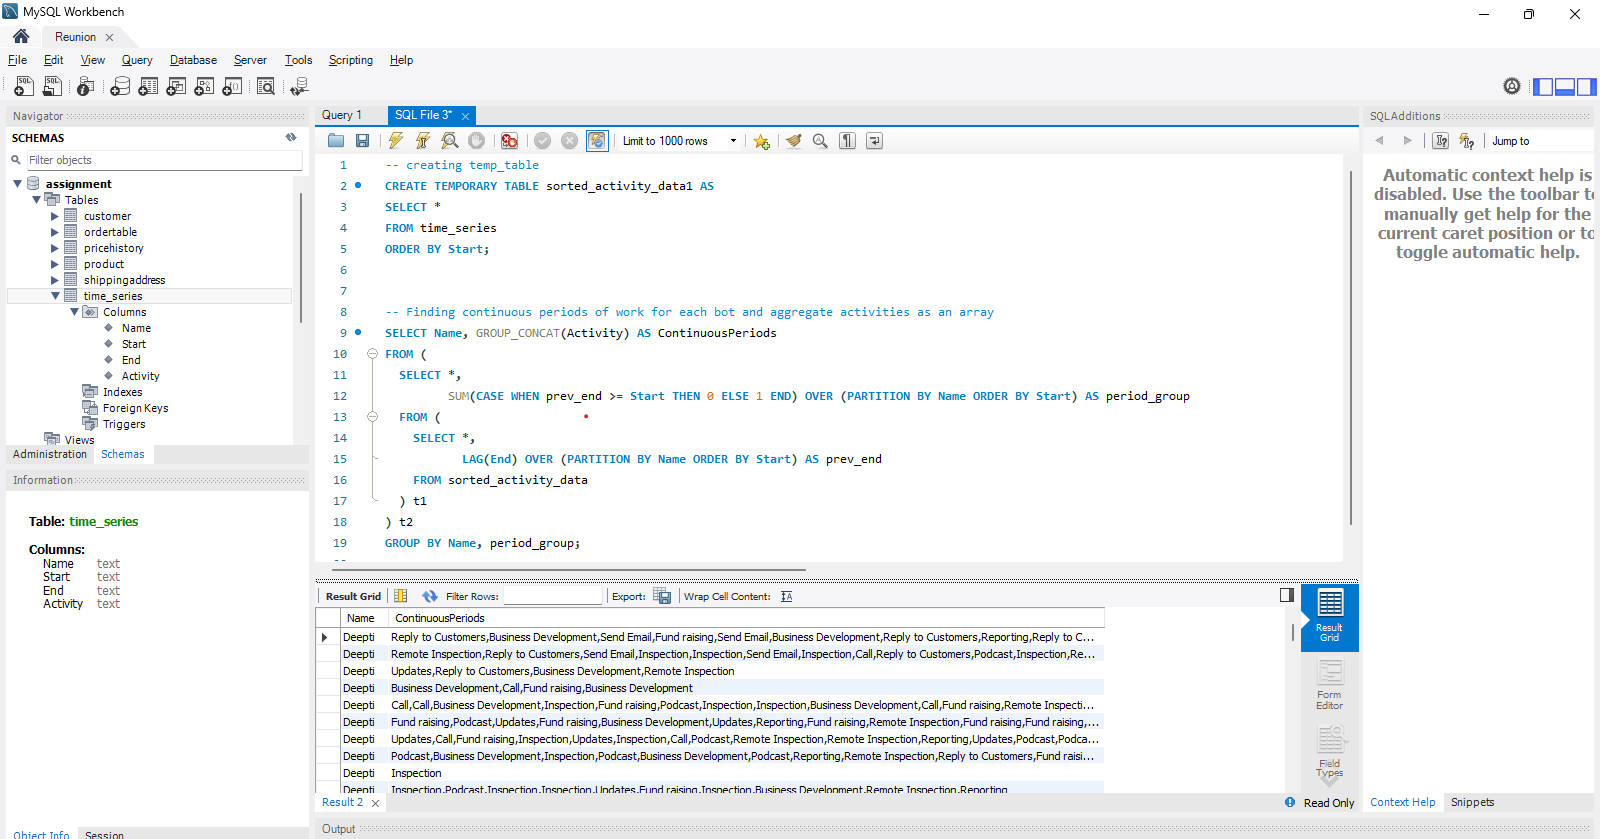

STEP : 01

#### >Created a temporary table called sorted_activity_data.

#### >The purpose of the temporary table is to store a copy of the data from the original activity_data table.

#### >Next i sort the data in the temporary table based on the Start column in ascending order.

#### >The sorted data is now stored in the sorted_activity_data table, and we can use it for further processing or analysis.

STEP : 02


##### The SQL query analyzes a dataset of activities performed by different bots. It identifies continuous periods of work for each bot and groups the activities within those periods.

##### To achieve this, the query first calculates the previous end time for each activity, which helps determine when the previous task was completed. It then assigns a unique identifier called "period_group" to each continuous work period of a bot. This identifier is based on whether the current activity starts immediately after the previous one or not.

##### Next, the query groups the data by bot's name and the "period_group." For each group, it concatenates the activities performed during that continuous work period using the GROUP_CONCAT() function, creating a comma-separated list of activities.

##### The final result of the query provides a summary of each bot's continuous work periods along with the activities performed during those periods, presented as comma-separated lists of activities.